In [2]:
from collections import defaultdict
import networkx as nx

In [3]:


def max_flow(graph, s, t):
    flow = 0
    while True:
        parent = defaultdict(lambda: -1)
        q = [s]
        while q:
            u = q.pop(0)
            for v, capacity in graph[u].items():
                if parent[v] == -1 and capacity > 0:
                    parent[v] = u
                    q.append(v)
        if parent[t] == -1:
            break
        f = float('inf')
        v = t
        while v != s:
            u = parent[v]
            f = min(f, graph[u][v])
            v = u
        flow += f
        v = t
        while v != s:
            u = parent[v]
            graph[u][v] -= f
            graph[v][u] += f
            v = u
    return flow


In [4]:


G = nx.DiGraph()

G.add_edge('s', 'a', capacity=3)
G.add_edge('s', 'b', capacity=2)
G.add_edge('a', 't', capacity=2)
G.add_edge('b', 't', capacity=3)

print(nx.maximum_flow(G, 's', 't'))



(4, {'s': {'a': 2, 'b': 2}, 'a': {'t': 2}, 'b': {'t': 2}, 't': {}})


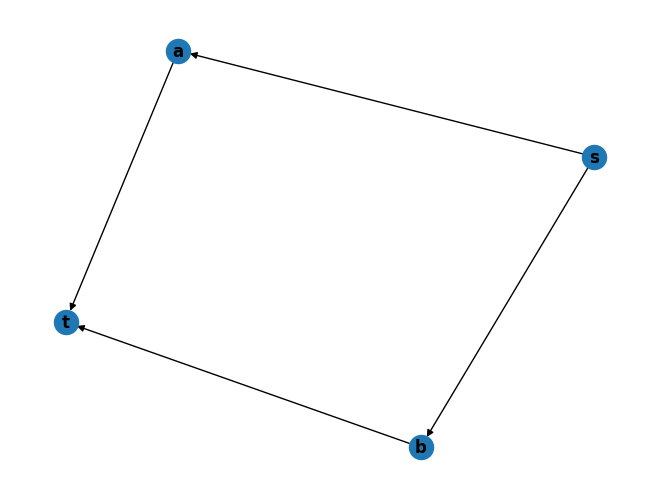

In [7]:
nx.draw(G, with_labels=True, font_weight='bold')


In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
G.add_edge('A', 'B', capacity=5)
G.add_edge('A', 'C', capacity=4)
G.add_edge('B', 'D', capacity=3)
G.add_edge('C', 'E', capacity=2)

# Calculate the maximum flow
flow_value, flow_dict = nx.maximum_flow(G, 'A', 'E')
color_map = []
print(flow_dict)
# Define a color map for the edges based on the flow value
for edge, capacity in nx.get_edge_attributes(G, 'capacity').items():
    print(edge, capacity)
    print(flow_dict[edge])
    if flow_dict[edge] == capacity:
        color_map.append('blue')
    else:
        color_map.append('red')

print(color_map)

nx.set_edge_attributes(G, color_map, 'color')

# Draw the graph with edge colors
nx.draw(G, with_labels=True, edge_color=color_map.values())

# Show the plot
plt.show()


{'A': {'B': 0, 'C': 2}, 'B': {'D': 0}, 'C': {'E': 2}, 'D': {}, 'E': {}}
('A', 'B') 5


KeyError: ('A', 'B')

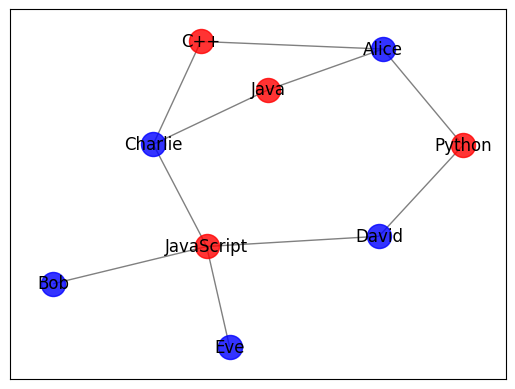

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty bipartite graph
G = nx.Graph()

# Add skills and students as nodes
skills = ["Python", "Java", "C++", "JavaScript"]
students = ["Alice", "Bob", "Charlie", "David", "Eve"]
G.add_nodes_from(skills, bipartite=0)
G.add_nodes_from(students, bipartite=1)

# Add edges between skills and students based on their abilities
G.add_edge("Python", "Alice")
G.add_edge("Python", "David")
G.add_edge("Java", "Alice")
G.add_edge("Java", "Charlie")
G.add_edge("C++", "Charlie")
G.add_edge("C++", "Alice")
G.add_edge("JavaScript", "David")
G.add_edge("JavaScript", "Charlie")
G.add_edge("JavaScript", "Eve")
G.add_edge("JavaScript", "Bob")


# Draw the graph
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=skills, node_color='r', node_size=300, alpha=0.8)
nx.draw_networkx_nodes(G, pos, nodelist=students, node_color='b', node_size=300, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos)
plt.show()


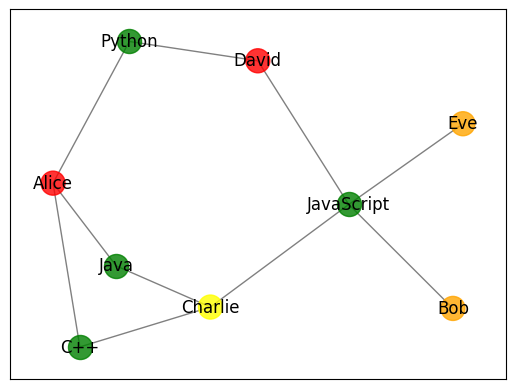

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add experts as nodes
experts = ["Alice", "Bob", "Charlie", "David", "Eve"]
G.add_nodes_from(experts)

# Add edges between experts based on their connections
G.add_edge("Python", "Alice")
G.add_edge("Python", "David")
G.add_edge("Java", "Alice")
G.add_edge("Java", "Charlie")
G.add_edge("C++", "Charlie")
G.add_edge("C++", "Alice")
G.add_edge("JavaScript", "David")
G.add_edge("JavaScript", "Charlie")
G.add_edge("JavaScript", "Eve")
G.add_edge("JavaScript", "Bob")

# Assign a level of expertise to each expert
expertise = {"Alice": "High", "Bob": "Medium", "Charlie": "Low", "David": "High", "Eve": "Medium"}

# Create a list of colors for each level of expertise
colors = {"High": "red", "Medium": "orange", "Low": "yellow"}

# Draw the graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=experts, node_color=[colors[expertise[node]] for node in experts], node_size=300, alpha=0.8)
nx.draw_networkx_nodes(G, pos, nodelist=skills, node_color='g', node_size=300, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos)
plt.show()


Alice 0.14880952380952378
Bob 0.0
Charlie 0.33928571428571425
David 0.15476190476190477
Eve 0.0
Python 0.10714285714285714
Java 0.06547619047619048
C++ 0.06547619047619048
JavaScript 0.5476190476190476


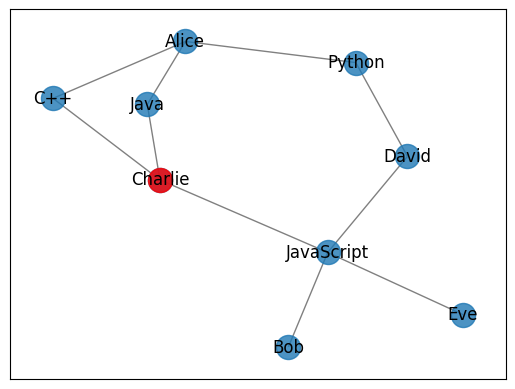

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(["Alice", "Bob", "Charlie", "David", "Eve"])

# Add edges between nodes
G.add_edge("Python", "Alice")
G.add_edge("Python", "David")
G.add_edge("Java", "Alice")
G.add_edge("Java", "Charlie")
G.add_edge("C++", "Charlie")
G.add_edge("C++", "Alice")
G.add_edge("JavaScript", "David")
G.add_edge("JavaScript", "Charlie")
G.add_edge("JavaScript", "Eve")
G.add_edge("JavaScript", "Bob")

# Compute betweenness centrality for each node
centrality = nx.betweenness_centrality(G)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=300, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos)

# Highlight influencers
influencers = []
for node, centrality in centrality.items():
    print(node, centrality)
    if centrality > 0.2 and node not in skills:

        influencers.append(node)
# influencers = [node for node in centrality if centrality[node] > 0.2]
nx.draw_networkx_nodes(G, pos, nodelist=influencers, node_color='red', node_size=300, alpha=0.8)

plt.show()


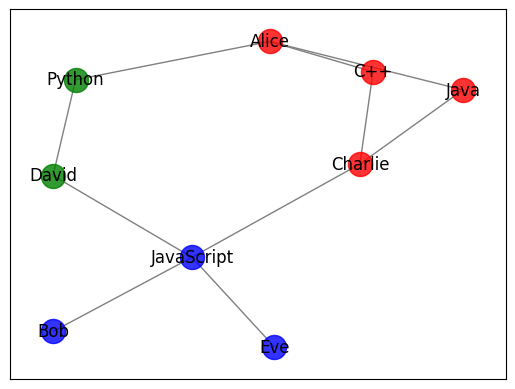

In [28]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

# Create an empty graph
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(["Alice", "Bob", "Charlie", "David", "Eve"])

# Add edges between nodes
G.add_edge("Python", "Alice")
G.add_edge("Python", "David")
G.add_edge("Java", "Alice")
G.add_edge("Java", "Charlie")
G.add_edge("C++", "Charlie")
G.add_edge("C++", "Alice")
G.add_edge("JavaScript", "David")
G.add_edge("JavaScript", "Charlie")
G.add_edge("JavaScript", "Eve")
G.add_edge("JavaScript", "Bob")
# Compute the communities using the Louvain method
communities = community_louvain.best_partition(G)

# Draw the graph
pos = nx.spring_layout(G)

# Create a list of colors for each community
colors = ['red', 'blue', 'green', 'purple', 'orange']

# Draw the nodes colored by community
for com in set(communities.values()):
    list_nodes = [nodes for nodes in communities.keys() if communities[nodes] == com]
    nx.draw_networkx_nodes(G, pos, nodelist=list_nodes, node_color = colors[com], node_size=300, alpha=0.8)

nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos)
plt.show()
